 # KMean's Algorithm for Image Segmentation

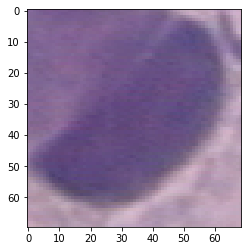

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

img1 = plt.imread("149143370-149143378-001.dib")
plt.imshow(img1)

[[[255   0   0 255]
  [255   0   0 255]
  [255   0   0 255]
  ...
  [255   0   0 255]
  [255   0   0 255]
  [255   0   0 255]]

 [[255   0   0 255]
  [255   0   0 255]
  [255   0   0 255]
  ...
  [255   0   0 255]
  [255   0   0 255]
  [255   0   0 255]]

 [[255   0   0 255]
  [255   0   0 255]
  [255   0   0 255]
  ...
  [255   0   0 255]
  [255   0   0 255]
  [255   0   0 255]]

 ...

 [[255   0   0 255]
  [255   0   0 255]
  [255   0   0 255]
  ...
  [255   0   0 255]
  [255   0   0 255]
  [255   0   0 255]]

 [[255   0   0 255]
  [255   0   0 255]
  [255   0   0 255]
  ...
  [255   0   0 255]
  [255   0   0 255]
  [255   0   0 255]]

 [[255   0   0 255]
  [255   0   0 255]
  [255   0   0 255]
  ...
  [255   0   0 255]
  [255   0   0 255]
  [255   0   0 255]]]


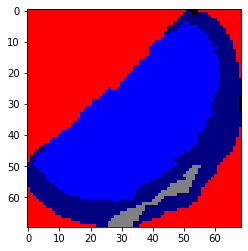

In [3]:
should_be=plt.imread("149143370-149143378-001-d.bmp")
plt.imshow(should_be)
print(should_be)

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 3 3 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


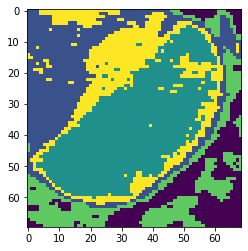

In [6]:
# Convert MxNx3 image into Kx3 where K=MxN
img2 = img1.reshape((-1, 3))


kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
model = kmeans.fit(img2)
predicted_values = kmeans.predict(img2)

segm_image = predicted_values.reshape((img1.shape[0], img1.shape[1]))
print(segm_image)
plt.imshow(segm_image)

[[[125  99 143]
  [125  99 143]
  [125  99 143]
  ...
  [194 168 189]
  [194 168 189]
  [194 168 189]]

 [[125  99 143]
  [125  99 143]
  [125  99 143]
  ...
  [194 168 189]
  [194 168 189]
  [194 168 189]]

 [[125  99 143]
  [125  99 143]
  [125  99 143]
  ...
  [194 168 189]
  [194 168 189]
  [194 168 189]]

 ...

 [[176 151 172]
  [176 151 172]
  [176 151 172]
  ...
  [194 168 189]
  [194 168 189]
  [194 168 189]]

 [[194 168 189]
  [194 168 189]
  [176 151 172]
  ...
  [194 168 189]
  [194 168 189]
  [194 168 189]]

 [[194 168 189]
  [194 168 189]
  [194 168 189]
  ...
  [194 168 189]
  [194 168 189]
  [194 168 189]]]


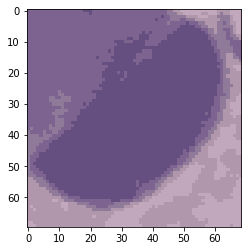

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

img = plt.imread('149143370-149143378-001.dib')       #cv.imread('149143370-149143378-001.dib')
img2 = img.reshape((-1,3))

# convert to np.float32
img2 = np.float32(img2)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 5
ret,label,center=cv.kmeans(img2,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

print(res2)
plt.imshow(res2)

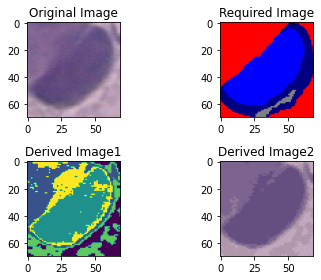

In [8]:
fig,ax=plt.subplots(2,2)
ax[0][0].imshow(img1)
ax[0][0].set_title("Original Image")

ax[0][1].imshow(should_be)
ax[0][1].set_title("Required Image")

ax[1][0].imshow(segm_image)
ax[1][0].set_title("Derived Image1")

ax[1][1].imshow(res2)
ax[1][1].set_title("Derived Image2")

fig.tight_layout()
plt.show()